## Plotando áudio 'blues'

In [1]:
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

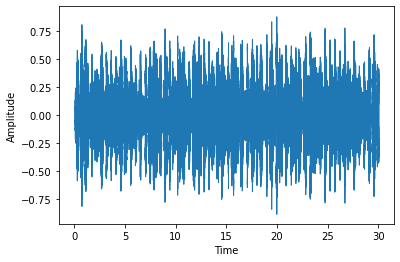

In [3]:
data, sr = librosa.load('./data/blues.00000.wav')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
librosa.display.waveshow(data, sr=sr)
plt.show()
Audio(data, rate=sr)

In [ ]:
# Áudio inteiro
f, ax = plt.subplots(figsize=(17, 5))
librosa.display.waveshow(data, sr=sr);

#### A amplitude referese ao volume do som, intensidade de perturbação e sua unidade mais utilizada é a de decibel(dB). 
#### A amostragem é a divisão da onda sonora em faixas de igual duração. 
#### Geralmente, os áudios utilizam taxas de frequência entre 8kHz e 48kHz.
#### Em uma amostragem de 48kHz há 48.000 amostras de som em um segundo. 
#### Nesse áudio é de 0.75 dB, tempo total de 30 segundos e a taxa de amostragem 0.045 segundos.

In [ ]:
# Plot fatia do áudio
f, ax = plt.subplots(figsize=(17, 5))
librosa.display.waveshow(data[59000: 60000], sr=sr);

In [ ]:
# Qual a transformada de Fourier do áudio inteiro?
wave_fft = np.fft.fft(data)

wave_fft_freq = np.fft.fftfreq(n=data.size, d=1/sr)
f, ax = plt.subplots(figsize=(17,5))

ax.plot(wave_fft_freq, abs(wave_fft.imag), color='black')
plt.title('FFT - Wave')
plt.xlim(0, 1_000)

In [ ]:
# Plote espectrograma referente ao áudio

C = librosa.amplitude_to_db(np.abs(librosa.cqt(data, sr)), ref=np.max)

f, ax = plt.subplots(figsize=(17,5))
librosa.display.specshow(C, y_axis='cqt_hz', x_axis='time', ax=ax);

#### O espectrograma nos auxilia na idendificação de vetores no tempo, cada um deles representa frequências no tempo. 
#### A matriz S identifica qual a magnitude de cada frequencia a cada bloco de tempo. 
#### Com isso, obtemos tempo e frequência, importante para a vizualização de sons. 

In [ ]:
# Short time Fourier Transform
D = librosa.stft(data)
log_power = librosa.amplitude_to_db(D**2, ref=np.max)

# Plotando
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(17, 10))
# Frequência linear
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()
# Frequência transformada em log
hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(data, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])# Obtendo o croma aplicando o Constant-Q transform (CQT)

ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB");

#### A frequência linear mostra um espectro a cada momento da música em terceira dimensão, em escala de cor. 

#### Quanto mais clara ou laranja a cor, mais forte a intensidade da frequência nos períodos de tempo mostrados.

#### A maior parte das frequências está concentrada entre 0 e 10.000. Afim de tornar o gráfico mais informativo,
#### utilizamos a escala transformada em log(frequência transformada em log). 

#### Quanto mais claro, maior a intensidade de som sendo que a escala vai de -80dB até +0dB. 

#### Dessa forma obtemos maiores detalhes sobre a música, nesse caso, a maioria dos sons ficando entre 0 e 2000Hz. 

#### Quanto mais baixa a frequência o som é mais grave e quanto mais alta, mais agudo.

In [ ]:
# O Chroma do áudio
chroma_cq = librosa.feature.chroma_cqt(y=data, sr=sr)

f, ax = plt.subplots(figsize=(17,5))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax);

In [ ]:
D.shape

#### O espectro é uma imagem e essa imagem(D) é uma matriz bidimensional. 

## Plotando o espectrograma do áudio 'country'

In [ ]:
data1, sr = librosa.load('country.00000.wav')

librosa.display.waveshow(data1, sr=sr)
plt.show()
Audio(data1, rate=sr)

In [ ]:
# Áudio inteiro
f, ax = plt.subplots(figsize=(17, 5))
librosa.display.waveshow(data1, sr=sr);

In [ ]:
# Plot fatia do áudio
f, ax = plt.subplots(figsize=(17, 5))
librosa.display.waveshow(data1[59000: 60000], sr=sr);

In [ ]:
# Qual a transformada de Fourier do áudio inteiro?
wave_fft = np.fft.fft(data1)

wave_fft_freq = np.fft.fftfreq(n=data1.size, d=1/sr)
f, ax = plt.subplots(figsize=(17,5))

ax.plot(wave_fft_freq, abs(wave_fft.imag), color='black')
plt.title('FFT - Wave')
plt.xlim(0, 1_000)

In [ ]:
# Plote espectrograma referente ao áudio

C = librosa.amplitude_to_db(np.abs(librosa.cqt(data1, sr)), ref=np.max)

f, ax = plt.subplots(figsize=(17,5))
librosa.display.specshow(C, y_axis='cqt_hz', x_axis='time', ax=ax);

In [ ]:
# Short time Fourier Transform
D = librosa.stft(data1)
log_power = librosa.amplitude_to_db(D**2, ref=np.max)

# Plotando
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(17, 10))
# Frequência linear
D = librosa.amplitude_to_db(np.abs(librosa.stft(data1)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()
# Frequência transformada em log
hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(data1, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])# Obtendo o croma aplicando o Constant-Q transform (CQT)

ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB");

In [ ]:
# O Chroma do áudio permite que identifiquemos as principais notas tocadas numa música,
# os pitchs, que é a nota principal.
chroma_cq = librosa.feature.chroma_cqt(y=data1, sr=sr)

f, ax = plt.subplots(figsize=(17,5))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax);

#### Os pitchs no nosso chroma são representados pelas cores amarelas,
#### mostram que temos diferentes notas predominantes ao longo da música. 
#### A nota de maior frequência foi a localizada entre G e F.

In [ ]:
D.shape 
# Parecido com o outro áudio

In [ ]:
# Usando o librosa.feature.melspectrogram() para computar o mel-spectrogram
melspectrum = librosa.feature.melspectrogram(y=data, sr=sr, hop_length= 512, window='hann', n_mels=256)
print(melspectrum.shape)

In [ ]:
# Mudando os parametros hop_length e n_mels
# Hop_length é equivalente a n_fft/2 onde n_fft é o FFT dum número de segmentos curtos.
melspectrum = librosa.feature.melspectrogram(y=data, sr=sr, hop_length= 200, window='hann', n_mels=128)
print(melspectrum.shape)

#### O 'Mel-spectogram' tem frequências convertidas para a escala de Mel,
#### afim evidenciar os componentes do som mais sensíveis ao ouvido humano.
#### O ouvido humano é capaz de perceber sons de frequências entre 20 Hz e 20 kHz.
#### A fórmula utilizada para conversão em escala de MEL é:
#### Mel(f) = 2595 × log10(1 + f/700)

In [ ]:
# Mel-spectrogram

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(melspectrum, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

In [ ]:
# Usando o librosa.feature.melspectrogram() para computar o mel-spectrogram
melspectrum = librosa.feature.melspectrogram(y=data1, sr=sr, hop_length= 512, window='hann', n_mels=256)
print(melspectrum.shape)

In [ ]:
# Mudando os parametros hop_length e n_mels
# Hop_length é equivalente a n_fft/2 onde n_fft é o FFT dum número de segmentos curtos.
melspectrum = librosa.feature.melspectrogram(y=data1, sr=sr, hop_length= 200, window='hann', n_mels=128)
print(melspectrum.shape)

In [ ]:
# Mel-spectrogram

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(melspectrum, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

#### Observa-se que a amostra de áudio Blues tem pico mais agudo de 80dB
#### enquanto o Country tem sua máxima em 70dB. Entretanto, a imagem do Country,
#### demonstra um agudo mais intenso pela maior parte da amostra. 
#### Outro ponto é que a imagem do Blues é mais simetrica e a Country é mais "borrada",
#### nessa primeira, mostrando um padrão melhor definido e uma distribuição mais constante de frequência.  

### Extraindo características do sinal utilizando a biblioteca librosa
### Feature - Descrição

In [ ]:
# Zero Crossing Rate - A taxa de mudanças do sinal durante a duração de um determinado quadro.
librosa.feature.zero_crossing_rate(data)

In [ ]:
# Energy - a soma dos quadrados dos valores do sinal, normalizados pelo respectivo comprimento do quadro.
librosa.feature.rms(y=data1)

In [ ]:
# Spectral Centroid - o centro de gravidade do espectro
cent = librosa.feature.spectral_centroid(y=data, sr=sr)
cent

In [ ]:
# MFCC - Mel Frequency Cepstral Coefficients formam uma representação cepstral 
# onde as bandas de frequência não são lineares, mas sim distribuídas de acordo com a escala mel.
mfcc = librosa.feature.mfcc(y=data1, sr=sr)
mfcc

In [ ]:
# Chroma Vector - uma representação de 12 elementos da energia espectral onde as caixas representam 
# as 12 classes de alturas iguais de música do tipo ocidental (espaçamento de semitons).
chroma = librosa.feature.chroma_stft(y=data, sr=sr)
chroma

### Importando os módulos

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import random
from fnmatch import fnmatch
from IPython.display import Audio
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Selecionando áudios de forma aleatória

In [2]:
def selecione_audio_aleatorio(root=r'C:\Users\joao\Downloads\archive\Data'):
    pattern = '*.wav'
    sounds = []
    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern):
                sounds.append(os.path.join(path, name))
                
    sound = random.choice(sounds)
    # Retorna caminho
    return sound

In [3]:
audio_aleatorio = selecione_audio_aleatorio()
Audio(audio_aleatorio)

####  Função auxiliar para transformar o nome da pasta do arquivo na sua classe

In [4]:
def nome2class(filename, df):
    filename = filename.split('/')[-1]
    class_name = df[df['slice_file_name'] == filename]['class'].values[0]
    return class_name

In [5]:
# Criando função para selecionar os targets
path = "C:/Users/joao/Downloads/archive/Data"
dirs = os.listdir( path )

In [6]:
for file in dirs:
    print(file)

blues
classical
country
disco
hiphop
jazz
metal
pop
reggae
rock


#### Selecionando audios de forma aleatória

In [7]:
def selecione_audio_aleatorio(root='./data'):
    pattern = '*.wav'
    sounds = []
    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern):
                sounds.append(os.path.join(path, name))
                
    sound = random.choice(sounds)
    # Retorna caminho
    return sound

In [8]:
audio_aleatorio = selecione_audio_aleatorio()
Audio(audio_aleatorio)

#### Carregando metadados

In [9]:
target_names = ["blues", "classical","country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
path = "C:/Users/joao/Downloads/archive/Data"

targets = []
audio_paths = []
for target_name in target_names:
    path_target = os.path.join(path, target_name)
    for audio in os.listdir(path_target):
        targets.append(target_name)
        audio_paths.append(os.path.join(path_target, audio))

In [10]:
len(targets) == len(audio_paths)

True

#### Função auxiliar para transformar o nome do arquivo na sua classe

In [11]:
def audio2feature(file_path, n_mfcc=40):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    mfcc_feature = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    mfcc_feature_escalonado = np.mean(mfcc_feature, axis=1)
    return mfcc_feature_escalonado

In [14]:
def get_data():
    music_styles = ["blues", "classical","country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"] 
    path = "C:/Users/joao/Downloads/archive/Data"
    audio_feature_data = [] # Lista com as amostras e features, cada linha uma amostra cada coluna uma feature
    targets = [] # Lista de alvos, cada linha uma amostra
    errors = []
    for music_style in music_styles:
        path_style = os.path.join(path, music_style)
        for audio in os.listdir(path_style):
            if audio.endswith('.wav'):
                try:
                    audio_path = os.path.join(path_style, audio)
            # Carregando o arquivo e transformando em feature
                    audio_feature = audio2feature(audio_path)
# print(audio_feature)
# Criando a lista de features, cada linha é uma amostra, cada coluna uma feature
                    audio_feature_data.append(audio_feature)
                    targets.append(music_style)
                except: 
                    errors.append(audio_path)
        # Transformando o audio_feature_data em um array
    audio_feature_data = np.asarray(audio_feature_data)
    return {'X': audio_feature_data, 'y': targets}

### Separando em features e target

In [15]:
data = get_data()
X = data['X']
y = data['y']

In [16]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

### Separando em treino e teste

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

### Treinando o modelo

In [19]:
# Instancia o modelo
model = RandomForestClassifier()
# Fit dos dados de treino
model.fit(X_train, y_train)
# Predict com dados de test
y_pred = model.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.71      0.67        14
           1       0.73      1.00      0.85        11
           2       0.67      0.31      0.42        26
           3       0.55      0.46      0.50        24
           4       0.48      0.37      0.42        27
           5       0.60      0.94      0.73        16
           6       0.65      0.94      0.77        18
           7       0.65      0.74      0.69        23
           8       0.63      0.57      0.60        21
           9       0.45      0.45      0.45        20

    accuracy                           0.60       200
   macro avg       0.60      0.65      0.61       200
weighted avg       0.59      0.60      0.58       200



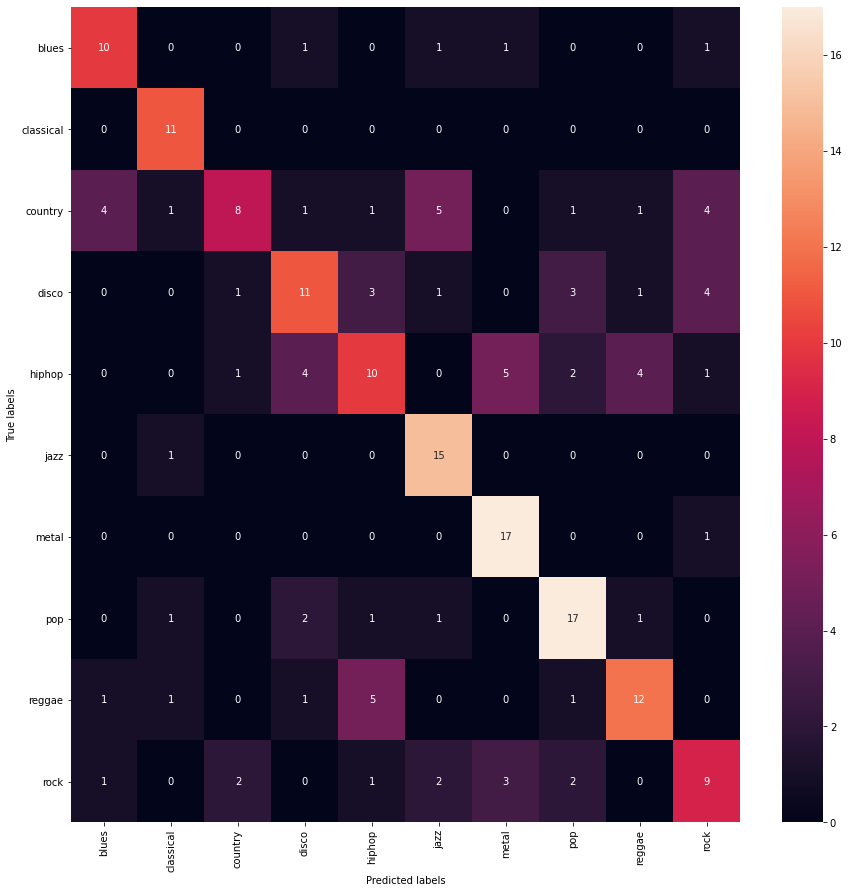

In [21]:
cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    ax=ax
)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(labelencoder.classes_)
ax.yaxis.set_ticklabels(labelencoder.classes_)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.show()